(0, 0)


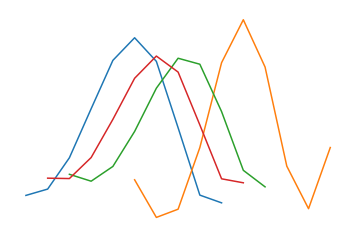

(0, 1)


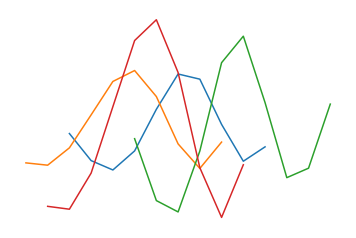

(0, 2)


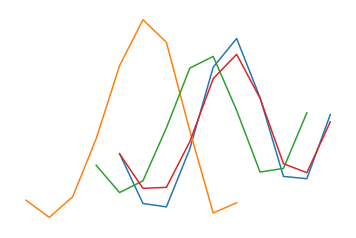

(1, 0)


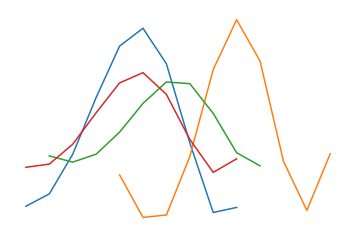

(1, 1)


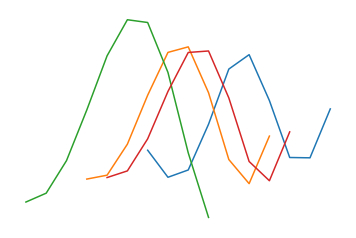

(1, 2)


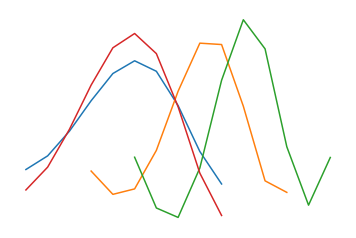

(2, 0)


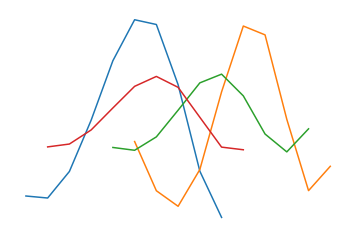

(2, 1)


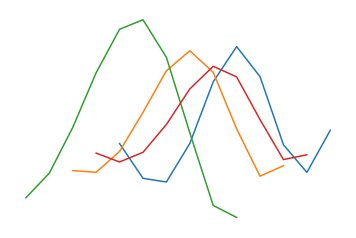

(2, 2)


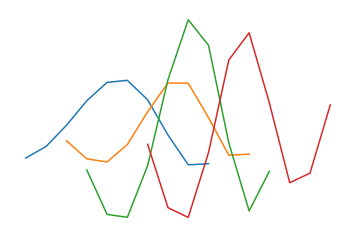

(9, 4, 2, 10)


In [15]:
import pycbc # A hard step, installed a Linux OS.
import numpy as np
import random
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector
apx = 'IMRPhenomPv2'
# General Noise, not randomed.
#%matplotlib qt
import matplotlib.pyplot as plt

import pycbc.noise
import pycbc.psd

# The color of the noise matches a PSD which you provide
flow = 40
delta_f = 1.0 / 40
flen = int(2048 / delta_f) + 1

T = 1024

psd_h1 = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd_v1 = pycbc.psd.analytical.AdvVirgo(flen, delta_f, flow)
psd_l1 = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd_k1 = pycbc.psd.analytical.KAGRADesignSensitivityT1600593(flen, delta_f, flow)
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.


det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')
det_k1 = Detector('K1')

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
# Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.


dec_range = np.linspace(0,0.3*np.pi,3)

ra_range = np.linspace(0,np.pi,3)

mass1_range = np.linspace(20,50,1)
mass2_range = mass1_range
spin1z_range = np.linspace(0, 0.9,1)
spin2z_range = spin1z_range
inclination_range=np.linspace(2.34,np.pi,1)
distance_range=[1,100,1]
pol_range=[0.9]
distance = 1

X = []
Y = []
for i1 in range(len(dec_range)):
    for i2 in range(len(ra_range)):
        print((i1, i2))
        for i3 in range(len(mass1_range)):
            for i4 in range(len(mass2_range)):
                if mass1_range[i3]<=mass2_range[i4]:
                    for i5 in range(len(spin1z_range)):
                        for i6 in range(len(spin2z_range)):
                            for i7 in range(len(inclination_range)):
                                for i8 in range(len(pol_range)):
                                #----------------------Random Noise Generation-------------------#
                                    seed_noise = random.randint(1,127)
                                    # Generate 1 seconds of noise at 4096 Hz
                                    delta_t = 1.0 / 2048
                                    tsamples = T

                                    noise_h1 = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_h1, seed=seed_noise)
                                    noise_l1 = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_l1, seed=seed_noise)
                                    noise_v1 = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_v1, seed=seed_noise)
                                    noise_k1 = pycbc.noise.noise_from_psd(tsamples, delta_t, psd_k1, seed=seed_noise)

                                    X0 = []
                                    
                                    hp, hc = get_td_waveform(approximant=apx,
                                                             distance=distance,
                                                             mass1=mass1_range[i3],
                                                             mass2=mass2_range[i4],
                                                             spin1z=spin1z_range[i5],
                                                             spin2z=spin2z_range[i6],
                                                             inclination=inclination_range[i7],
                                                             coa_phase=2.45,
                                                             delta_t=1.0/2048,
                                                             f_lower=40)

                                    signal_h1 = det_h1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    signal_l1 = det_l1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    signal_v1 = det_v1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    signal_k1 = det_k1.project_wave(hp, hc,  ra_range[i2], dec_range[i1], pol_range[i8])
                                    
                                    signal_h1_array = np.array(signal_h1)[-T:] #+ np.array(noise_h1)
                                    #signal_h1_array = signal_h1_array[-T:] #+ np.array(noise_h1)
                                    
                                    signal_l1_array = np.array(signal_l1)[-T:] #+ np.array(noise_l1)
                                    #signal_l1_array = signal_l1_array[-T:] #+ np.array(noise_h1)
                                    
                                    signal_v1_array = np.array(signal_v1)[-T:] #+ np.array(noise_v1)
                                    #signal_v1_array = signal_v1_array[-T:] #+ np.array(noise_h1)
                                    
                                    signal_k1_array = np.array(signal_k1)[-T:] #+ np.array(noise_k1)
                                    #signal_k1_array = signal_k1_array[-T:] #+ np.array(noise_h1)
        
                                    
                                    end_time = 1192529720
                                    hp.start_time += end_time
                                    hc.start_time += end_time
                                    
                                    list_h1 = signal_h1_array.tolist()
                                    list_l1 = signal_l1_array.tolist()
                                    list_v1 = signal_v1_array.tolist()
                                    list_k1 = signal_k1_array.tolist()
                                    
                                    h1_max = max(list_h1)*10**21
                                    l1_max = max(list_l1)*10**21
                                    v1_max = max(list_v1)*10**21
                                    k1_max = max(list_k1)*10**21
                                    
                            
                                    h1_max_index = list_h1.index(max(list_h1))
                                    l1_max_index = list_l1.index(max(list_l1))
                                    v1_max_index = list_v1.index(max(list_v1))
                                    k1_max_index = list_k1.index(max(list_k1))
                                    
                                    
                                    #X0.append([h1_max, h1_max_index])
                                    #X0.append([l1_max, l1_max_index])
                                    #X0.append([v1_max, v1_max_index])
                                    #X0.append([k1_max, k1_max_index])
                                    
                                    X0.append([100*np.array(signal_h1.sample_times[h1_max_index-5:h1_max_index+5])-100*signal_h1.sample_times[h1_max_index-5],
                                               10**21*signal_h1_array[h1_max_index-5:h1_max_index+5]])
                                    X0.append([100*np.array(signal_l1.sample_times[l1_max_index-5:l1_max_index+5])-100*signal_l1.sample_times[h1_max_index-5],
                                               10**21*signal_l1_array[l1_max_index-5:l1_max_index+5]])
                                    X0.append([100*np.array(signal_v1.sample_times[v1_max_index-5:v1_max_index+5])-100*signal_v1.sample_times[h1_max_index-5],
                                               10**21*signal_v1_array[v1_max_index-5:v1_max_index+5]])
                                    X0.append([100*np.array(signal_k1.sample_times[k1_max_index-5:k1_max_index+5])-100*signal_k1.sample_times[h1_max_index-5],
                                               10**21*signal_k1_array[k1_max_index-5:k1_max_index+5]])
                                    
                                    X.append(X0)
                                    
                                    #print(h1_max, signal_h1.sample_times[h1_max_index]*10**6/len(np.array(signal_h1.sample_times)))
                                    #print(l1_max, signal_l1.sample_times[l1_max_index]*10**6/len(np.array(signal_l1.sample_times)))
                                    #print(v1_max, signal_v1.sample_times[v1_max_index]*10**6/len(np.array(signal_v1.sample_times)))
                                    #print(k1_max, signal_k1.sample_times[k1_max_index]*10**6/len(np.array(signal_k1.sample_times)))
                                    
                                    #----------Check the noisy wavefrom---------#
                                    plt.plot(np.array(signal_h1.sample_times[h1_max_index-5:h1_max_index+5])-signal_h1.sample_times[h1_max_index-5],
                                               signal_h1_array[h1_max_index-5:h1_max_index+5], label='h1')
                                    plt.plot(np.array(signal_l1.sample_times[l1_max_index-5:l1_max_index+5])-signal_l1.sample_times[h1_max_index-5],
                                               signal_l1_array[l1_max_index-5:l1_max_index+5], label='l1')
                                    plt.plot(np.array(signal_v1.sample_times[v1_max_index-5:v1_max_index+5])-signal_v1.sample_times[h1_max_index-5],
                                               signal_v1_array[v1_max_index-5:v1_max_index+5], label='v1')
                                    plt.plot(np.array(signal_k1.sample_times[k1_max_index-5:k1_max_index+5])-signal_k1.sample_times[h1_max_index-5],
                                               signal_k1_array[k1_max_index-5:k1_max_index+5], label='k1')
                                    plt.axis('off')
                                    plt.xticks([])
                                    plt.yticks([])                                    
                                    #plt.legend()

                                    #plt.savefig(str(i1)+str(i2)+str(i3)+str(i4)+str(i5)+str(i6)+str(i7)+str(i8))

                                    #plt.close()
                                    plt.show()
                                    #----------Check Over----------#
X = np.array(X)

print(X.shape)

np.save('X_4_16_1_train.npy', X)


In [2]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform

# Time, orientation and location of the source in the sky
ra = 1.7
dec = 0
pol = 0.2
inc = 0
time = 1000000000

# We can calcualate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")

# We get back the fp and fc antenna pattern weights.
fp, fc = d.antenna_pattern(ra, dec, pol, time)
print("fp={}, fc={}".format(fp, fc))

# These factors allow us to project a signal into what the detector would
# observe

## Generate a waveform
hp, hc = get_td_waveform(approximant="IMRPhenomPv2", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
ht = fp * hp + fc * hc


# The projection process can also take into account the rotation of the
# earth using the project wave function.
hp.start_time = hc.start_time = time
ht = d.project_wave(hp, hc, ra, dec, pol)


fp=-0.59739369744, fc=-0.375095733973


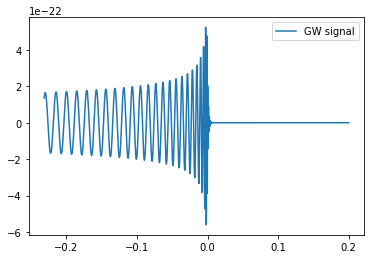

In [3]:
import matplotlib.pyplot as plt
h = Detector("H1")
l = Detector("L1")
hph, hch = get_td_waveform(approximant="IMRPhenomPv2", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)
hpl, hcl = get_td_waveform(approximant="IMRPhenomPv2", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

plt.plot(hpl.sample_times[31000:], hpl[31000:], label = 'GW signal')
#plt.plot(hpk.sample_times[31000:], hpk[31000:], label = 'V1')
plt.legend()
plt.show()


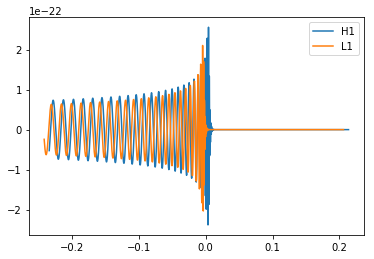

In [5]:
import numpy as np
hth = d.project_wave(hph, hch, ra, dec, pol)
htl = l.project_wave(hpl, hcl, ra, dec, pol)
plt.plot(np.array(hth.sample_times[31000:]), np.array(hth[31000:]), label = 'H1')
plt.plot(np.array(htl.sample_times[31000:]), np.array(htl[31000:]), label = 'L1')
plt.legend()
plt.show()


In [48]:
print(len(hth))

32834
